In [4]:

import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [5]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p,x):
    f = sp.poly1d(p)
    return f(x)

def residuals_func(p,x,y):
    ret = fit_func(p,x)-y
    return ret


In [6]:
import numpy as np
a = [2,0,0]

f = np.poly1d(a)
print(f)
print(f([2,3,4]))

   2
2 x
[ 8 18 32]


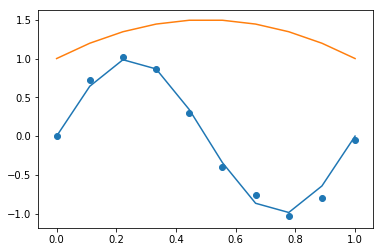

In [7]:
x = np.linspace(0,1,10)
#标准正弦
y_sin = real_func(x)
#加上正态分布的噪声
y_real = [np.random.normal(0,0.1)+t for t in y_sin]
#多项式
param = [-2,2,1]
p = fit_func(param,x)
y_p = p

#绘制图像
plt.plot(x,y_sin)
plt.scatter(x,y_real)
plt.plot(x,y_p)

In [16]:
def fitting(M=0):
    
    p_init = np.random.rand(M + 1)
    p_lsq = leastsq(residuals_func,p_init,args=(x,y_real))
    print(p_lsq[0])
    
    plt.plot(x,real_func(x),label='real')
    plt.plot(x,fit_func(p_lsq[0],x),label='fit')
    plt.plot(x,y_real,'bo',label='noise')
    plt.legend()
    return p_lsq[0]

[-0.01231015]


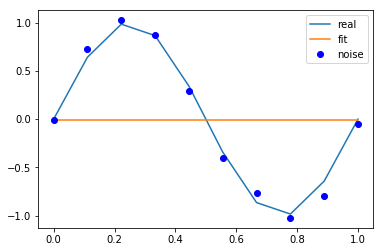

In [9]:
fitting(0)

[-1.46881012  0.72209491]


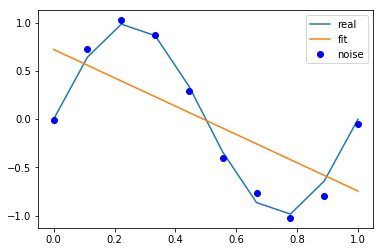

In [10]:
fitting(1)

[ 2.12376674e+01 -3.19711146e+01  1.07329202e+01 -2.90264469e-02]


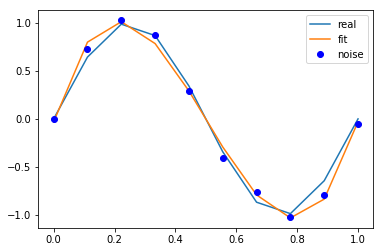

In [11]:
fitting(3)

[-1.13538685e+04  4.89069066e+04 -8.77653932e+04  8.51416548e+04
 -4.85156481e+04  1.65482109e+04 -3.28082719e+03  3.24465168e+02
 -5.54928857e+00 -4.78219519e-03]


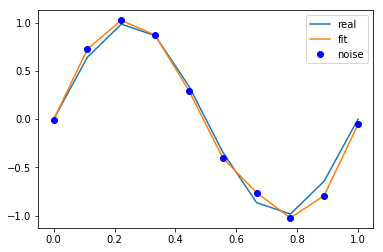

In [12]:
fitting(9)

In [13]:
regularization = 0.0001
def residuals_func_regulaization(p,x,y):
    ret = (np.poly1d(p))(x) - y
    ret = np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [18]:
a = [1,2,3]
np.square(a)

array([1, 4, 9])

In [14]:
p_init = np.random.rand(10)
p_lsq_regular = leastsq(residuals_func_regulaization,p_init,args=(x,y_real))

[-1.13538685e+04  4.89069066e+04 -8.77653932e+04  8.51416548e+04
 -4.85156481e+04  1.65482109e+04 -3.28082719e+03  3.24465168e+02
 -5.54928857e+00 -4.78219519e-03]


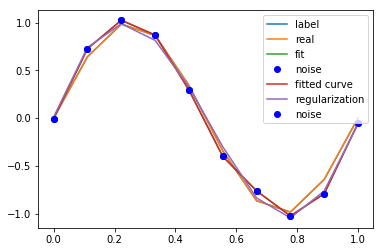

In [17]:
plt.plot(x,real_func(x),label='label')
plt.plot(x,np.poly1d(fitting(9))(x),label='fitted curve')
plt.plot(x,np.poly1d(p_lsq_regular[0])(x),label='regularization')
plt.plot(x,y_real,'bo',label='noise')
plt.legend()
